<center> <h1>Bank Market Research</h1> </center>
<center> <h2>Trees and Random Forests</h2> </center>
<center> <h3> Oliver Heady <h3> <center>

In [ ]:
# load packages here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score



from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#set seed
import random
random.seed(5600)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data and Description

A bank is interested in reaching out to customers directly (via phone) to solicit subscriptions to a new product they are planning to offer. The company has over 45k customers and only a small number of phone agents to contact them, so targeting those that are most likely to subscribe will maximize their return on investment.

Prior to contacting them, they have asked their Data Science team to analyze customer characteristics for a similar product campaign they ran in the previous year. Your goal is to construct an effective tree-based model to predict whether a customer will subscribe or not. This will allow the bank to conduct a small, targeted outreach to customers most likely to subscribe to their new product.

The data set contains information on 45,211 customers. There are too many predictor variables to list here, but you can read more about them at this link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#. The response variable is "y" and denotes the a customer subscribed to the previous years' product campaign or not.

The data can be found in the bank-full data set on Canvas. Download bank-full.csv, and put it in the same folder as this file.

#### 0. Replace the text "\< YOUR NAME HERE \>" (above) with your full name.

#### 1. Read in the data set and call it "bank_full". **Note that the separator in the data set is a semi-colon, not a comma.** Print the top few rows of the data and make sure the data makes sense.

In [ ]:
bank_full = pd.read_table("/bank-full.csv", delimiter = ';')
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### 2. For simplicity and for sake of time, we are only going to use a random subset of 4,000 customers. Create a new data frame called "bank" that only includes 4,000 randomly selected customers. Print a summary of the data.

In [ ]:
# Randomly select 4000 customers
bank = bank_full.sample(n=4000, random_state=42)

# Print a summary of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3776 to 18046
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  month      4000 non-null   object
 11  duration   4000 non-null   int64 
 12  campaign   4000 non-null   int64 
 13  pdays      4000 non-null   int64 
 14  previous   4000 non-null   int64 
 15  poutcome   4000 non-null   object
 16  y          4000 non-null   object
dtypes: int64(7), object(10)
memory usage: 562.5+ KB


#### 3. For simplicity and for sake of time, we are only going to use the following variables for this assignment: age, balance, duration, campaign, pdays, default, housing, and poutcome. Subset the "bank" data frame to only include these variables and the response (y). Print a summary of the data.

In [ ]:
# Selecting only the specified columns
columns_to_keep = ['age', 'balance', 'duration', 'campaign', 'pdays', 'default', 'housing', 'poutcome', 'y']
bank = bank[columns_to_keep]

# Print a summary of the new subset data
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3776 to 18046
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       4000 non-null   int64 
 1   balance   4000 non-null   int64 
 2   duration  4000 non-null   int64 
 3   campaign  4000 non-null   int64 
 4   pdays     4000 non-null   int64 
 5   default   4000 non-null   object
 6   housing   4000 non-null   object
 7   poutcome  4000 non-null   object
 8   y         4000 non-null   object
dtypes: int64(5), object(4)
memory usage: 312.5+ KB


In [ ]:
bank.head()

,age,balance,duration,campaign,pdays,default,housing,poutcome,y
3776,40,580,192,1,-1,no,yes,unknown,no
9928,47,3644,83,2,-1,no,no,unknown,no
33409,25,538,226,1,-1,no,yes,unknown,no
31885,42,1773,311,1,336,no,no,failure,no
15738,56,217,121,2,-1,no,no,unknown,no


#### 4. Convert the response y to have 0s and 1s as values instead of "no" and "yes." Check that this worked by using the value_counts() function (you should have data for both the 1 and 0 classes).

In [ ]:
# Converting the response 'y' to 0s and 1s
bank['y'] = bank['y'].map({'no': 0, 'yes': 1})

# Check that the conversion worked using value_counts()
response_counts = bank['y'].value_counts()

print(response_counts)

0    3509
1     491
Name: y, dtype: int64


In [ ]:
bank.head()

,age,balance,duration,campaign,pdays,default,housing,poutcome,y
3776,40,580,192,1,-1,no,yes,unknown,0
9928,47,3644,83,2,-1,no,no,unknown,0
33409,25,538,226,1,-1,no,yes,unknown,0
31885,42,1773,311,1,336,no,no,failure,0
15738,56,217,121,2,-1,no,no,unknown,0


#### 5. What is our baseline accuracy rate? This is the majority classifier which is equivalent to us labelling everything as the predominant class.

In [ ]:
# Calculate the baseline accuracy rate
print('Baseline Accuracy:', 3509/(3509+491))

Baseline Accuracy: 0.87725


#### 6. Create dummy variables for the categorical variables (then drop the original categorical variables). *Hint: you can use the drop_first = True option in get_dummies() to automatically drop a level.*

In [ ]:
# Creating dummy variables for categorical variables and dropping the original categorical variables
categorical_vars = ['default',	'housing', 'poutcome']
bank = pd.get_dummies(bank, columns=categorical_vars, drop_first=True)
bank.head()

,age,balance,duration,campaign,pdays,y,default_yes,housing_yes,poutcome_other,poutcome_success,poutcome_unknown
3776,40,580,192,1,-1,0,0,1,0,0,1
9928,47,3644,83,2,-1,0,0,0,0,0,1
33409,25,538,226,1,-1,0,0,1,0,0,1
31885,42,1773,311,1,336,0,0,0,0,0,0
15738,56,217,121,2,-1,0,0,0,0,0,1


### Normally, we would do EDA here, which we are skipping for sake of time.

#### 7. Split the data set into train and test sets using an 80/20 split.

In [ ]:
y = bank['y']
X = bank.drop('y', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5600)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3200, 10) (3200,)
(800, 10) (800,)


## The next several questions involve creating a classification decision tree

#### 8. Find the optimal alpha value (using the 1 SE rule) using cross-validation on the training data. Instead of outputting the value of alpha, outputing a plot with the chosen point highlighted in orange (as in the class coding) is sufficient.

In [ ]:
# Get range of alpha values
model = DecisionTreeClassifier(criterion = "gini",
                              splitter = "best",
                              random_state = 5600)
path = model.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

In [ ]:
# Using training data, run 5-fold cross-validation to obtain PMSEs for each alpha
cv = KFold(n_splits = 5,
           shuffle = True,
           random_state = 5600)
tree = GridSearchCV(DecisionTreeRegressor(criterion = "squared_error",
                                          splitter = "best",
                                          random_state = 5600),
                    param_grid = {'ccp_alpha':alphas},
                    scoring = 'neg_mean_squared_error',
                    n_jobs = -1,
                    verbose = 1,
                    cv = cv)
tree.fit(X_train, y_train)
print("Best Negative PMSE =", tree.best_score_, tree.best_params_)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best Negative PMSE = -0.0830147859729411 {'ccp_alpha': 0.0006678673744523088}


In [ ]:
gridcv_results = pd.DataFrame(tree.cv_results_)
pmse_means = -gridcv_results['mean_test_score']
pmse_std_error = gridcv_results['std_test_score']

gridcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036078,0.006834,0.006785,0.004222,0.0,{'ccp_alpha': 0.0},-0.150000,-0.137500,-0.157812,-0.157812,-0.150000,-0.150625,0.007435,147
1,0.032357,0.007909,0.007698,0.002635,0.000155,{'ccp_alpha': 0.0001552972560975612},-0.145624,-0.137806,-0.155974,-0.152482,-0.141954,-0.146768,0.006666,146
2,0.040972,0.006585,0.007211,0.002051,0.000195,{'ccp_alpha': 0.00019531249999999998},-0.138613,-0.123641,-0.148134,-0.140534,-0.117515,-0.133687,0.011334,145
3,0.026734,0.007341,0.006602,0.003154,0.000197,{'ccp_alpha': 0.0001967592592592593},-0.138613,-0.124032,-0.148134,-0.139362,-0.114246,-0.132878,0.012109,144
4,0.031798,0.007841,0.004588,0.002937,0.000206,{'ccp_alpha': 0.00020629084967320238},-0.131884,-0.124029,-0.150919,-0.139362,-0.112971,-0.131833,0.012943,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.047615,0.015285,0.009035,0.003832,0.00213,{'ccp_alpha': 0.0021302477423961047},-0.094417,-0.084964,-0.091524,-0.089072,-0.072275,-0.086450,0.007736,41
143,0.047813,0.013717,0.005832,0.005268,0.002262,{'ccp_alpha': 0.002262390829467102},-0.094417,-0.084964,-0.091524,-0.089072,-0.074522,-0.086900,0.006922,48
144,0.052688,0.012058,0.007450,0.004105,0.003089,{'ccp_alpha': 0.0030894958483182883},-0.094417,-0.084964,-0.091524,-0.089072,-0.074522,-0.086900,0.006922,48
145,0.034573,0.011404,0.004303,0.002850,0.01859,{'ccp_alpha': 0.01859042945214244},-0.116550,-0.104667,-0.110574,-0.112957,-0.091912,-0.107332,0.008626,96


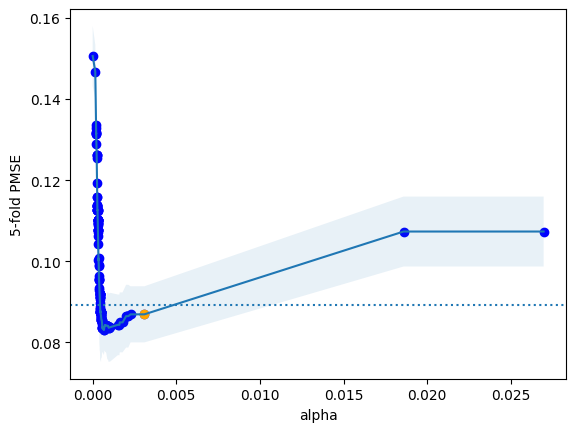

In [ ]:
# Find the PMSE that is one standard error away from the minimum PMSE
alpha_index_min = np.argmin(pmse_means)
one_se_above_min = min(pmse_means) + pmse_std_error[alpha_index_min]

# Find the largetst alpha with MSE less than or equal to one_se_above_min
alpha_index_1se = np.where(pmse_means <= one_se_above_min)[0][::-1][0]
alpha_1se = alphas[alpha_index_1se]

plt.plot(alphas, pmse_means)
plt.scatter(alphas,
            pmse_means,
            marker = 'o',
            color = 'blue')
plt.fill_between(alphas,
                 pmse_means + pmse_std_error,
                 pmse_means - pmse_std_error,
                 alpha = 0.1)
plt.axhline(one_se_above_min,
            linestyle = 'dotted',
            label = 'Best + One SE')
plt.scatter([alpha_1se],
            [pmse_means[alpha_index_1se]],
            marker = 'o',
            color = 'orange',
            label = 'One SE Rule')
# plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('5-fold PMSE')
plt.show()
# smaller alpha = more leaves, larger alpha = fewer leaves

#### 9. Using the optimal alpha value (1 SE rule), fit a pruned tree on the training data. Plot the tree.

In [ ]:
base_tree = DecisionTreeClassifier(criterion = "gini",
                                  splitter = "best",
                                  random_state = 5600,
                                  ccp_alpha=0.0025)
base_tree.fit(X_train, y_train)

print(f'Training R^2: {round(base_tree.score(X_train, y_train), 4)}')
print(f'Test R^2: {round(base_tree.score(X_test, y_test), 4)}')

Training R^2: 0.8856
Test R^2: 0.8825


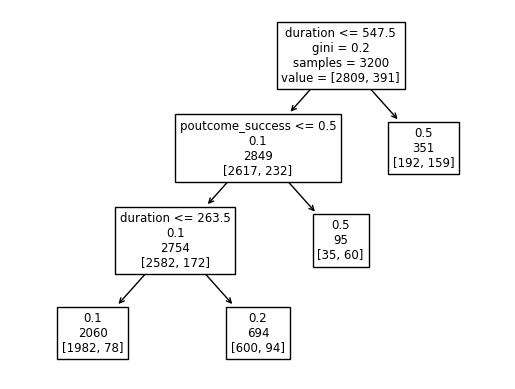

In [ ]:
plot_tree(base_tree,
          precision = 1,
          label = "root",
          feature_names = ['age',	'balance',	'duration',	'campaign',	'pdays',	'default_yes',	'housing_yes',	'poutcome_other',	'poutcome_success',	'poutcome_unknown']);

#### 10. Based on this tree, which variables seem to be important?

Duration and poutcome are the most important.

#### 11. How many leaves are there in this tree?

Four leaves!

#### 12. What is the depth of this tree?

The depth is three.

#### 13. Using the pruned tree, run the test data set through the tree and assess model performance by computing the overall test set accuracy.

In [ ]:
# Get n for training and testing data
n_train = X_train.shape[0]
n_test = X_test.shape[0]
print(n_train, n_test)

3200 800


In [ ]:
# RMSE train
tree_min_alpha_train_preds = base_tree_min_alpha.predict(X_train)
rmse_train_min = np.sqrt(sum((y_train - tree_min_alpha_train_preds)**2) / n_train)

# RMSE test
tree_min_alpha_test_preds = base_tree_min_alpha.predict(X_test)
rmse_test_min = np.sqrt(sum((y_test - tree_min_alpha_test_preds)**2) / n_test)

print(f'Train RMSE: {round(rmse_train_min, 2)}')
print(f'Test RMSE: {round(rmse_test_min, 2)}')

Train RMSE: 0.28
Test RMSE: 0.29


In [ ]:
# R2 train
r2_train_tree_1se = base_tree.score(X_train, y_train)

# R2 test
r2_test_tree_1se = base_tree.score(X_test, y_test)

print(f'Training R^2: {round(r2_train_tree_1se, 4)}')
print(f'Test R^2: {round(r2_test_tree_1se, 4)}')

Training R^2: 0.8856
Test R^2: 0.8825


In [ ]:
# RMSE train
tree_1se_alpha_train_preds = base_tree.predict(X_train)
rmse_train_1se = np.sqrt(sum((y_train - tree_1se_alpha_train_preds)**2) / n_train)

# RMSE test
tree_1se_alpha_test_preds = base_tree.predict(X_test)
rmse_test_1se = np.sqrt(sum((y_test - tree_1se_alpha_test_preds)**2) / n_test)

print(f'Train RMSE: {round(rmse_train_1se, 2)}')
print(f'Test RMSE: {round(rmse_test_1se, 2)}')

Train RMSE: 0.34
Test RMSE: 0.34


#### 14. Compared to our baseline accuracy (computed in question 5), what is our increase in accuracy by using this model? In other words, what is the difference in accuracies between this model and the baseline?

Our new r^2 of 0.8825 is barely higher than .877 (our baseline). This model isn't great.

## The next several questions involve creating a classification random forest

#### 15. Create a random forest model on the training data

In [ ]:
bank_rf = RandomForestClassifier(n_estimators = 100,  # number of trees in forest
                                criterion = "gini",
                                max_depth = None,  # grow full trees
                                max_features = "sqrt",  # consider sqrt(p) features when splitting
                                bootstrap = True,  # use bootstrap samples to build trees
                                oob_score = True,  # return OOB accuracy results
                                random_state = 5600)
bank_rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=5600)

#### 16. Compute the overall test set accuracy.

In [ ]:
print(f'OOB Accuracy: {round(bank_rf.oob_score_, 2)}')
print(f'Test Accuracy: {round(bank_rf.score(X_test, y_test), 2)}')

OOB Accuracy: 0.89
Test Accuracy: 0.89


#### 17. Comment on and compare the three accuracies (obtained via the majority classifier, a decision tree, and random forest).

The majority classifier was 87%, the tree gave us 88%, and the random forests gave us 89%. they aren't that great, and there might be better information to help us make a better model.

#### 18. Create a variable importance plot.

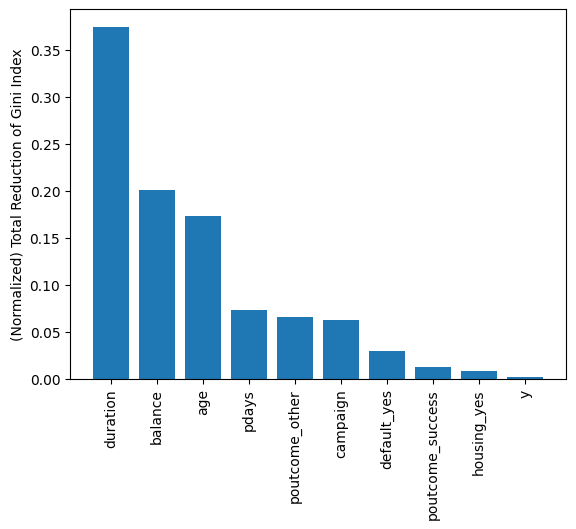

In [ ]:
variable_importance = bank_rf.feature_importances_
variable_names = list(bank.columns.values)[:-1]

# Get order to sort variables by importance in descending order
sorted_indices = variable_importance.argsort()[::-1]

# Sort variables by importance in descending order
variable_names_sorted = [variable_names[i] for i in sorted_indices]
variable_importance_sorted = [variable_importance[i] for i in sorted_indices]

plt.bar(x = variable_names_sorted,
        height = variable_importance_sorted)
plt.xticks(rotation = 90)
plt.ylabel('(Normalized) Total Reduction of Gini Index')
plt.show()

#### 19. Create a permutation importance plot.

In [ ]:
# Use 10-fold cross-validation to understand varaibility in permutation importance results
cv_perm_imp = []
folds = np.random.randint(0, 10, X_train.shape[0])  # return X_train.shape[0] random values from 0 to 10

for i in range(10):
    train_fold_x = X_train[folds != i]
    train_fold_y = y_train[folds != i]
    val_fold_x = X_train[folds == i]
    val_fold_y = y_train[folds == i]

    clf = RandomForestClassifier(n_estimators = 100,
                                 criterion = "gini",
                                 max_depth = None,
                                 max_features = "sqrt",
                                 bootstrap = True,
                                 oob_score = False,
                                 random_state = 5600).fit(train_fold_x, train_fold_y)

    perm_imp = permutation_importance(clf,
                                      val_fold_x,
                                      val_fold_y,
                                      n_repeats = 30,  # Number of times to permute a feature
                                      random_state = 5600)
    cv_perm_imp.append(perm_imp['importances_mean'])

cv_perm_imp = np.stack(cv_perm_imp)

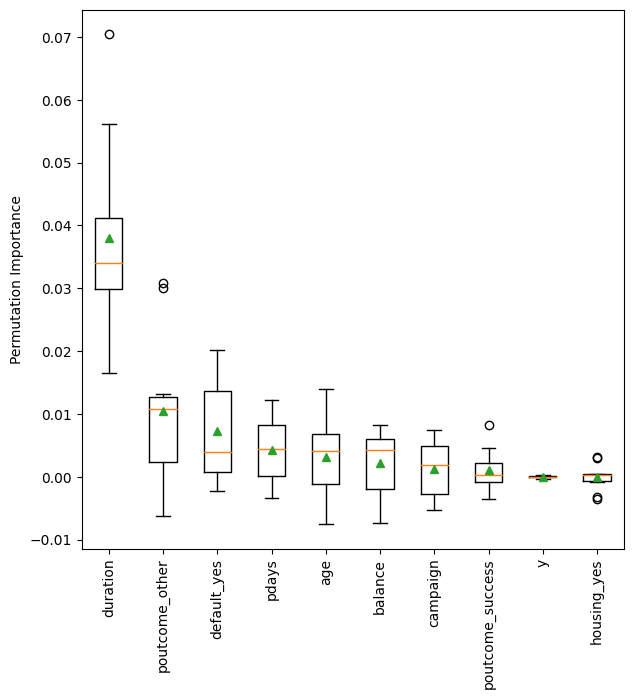

In [ ]:
# Calculate the mean permutation importance for each variable across the 10-folds
mean_perm_imp = np.mean(cv_perm_imp, axis = 0)

# Get order to sort variables by importance in descending order
sort_indices = np.argsort(mean_perm_imp)[::-1]

# Sort variables by importance in descending order
variable_names_sort = [variable_names[i] for i in sort_indices]
permutation_importance_sort = [cv_perm_imp[:, i] for i in sort_indices]

# plot the 10-fold cv results for each variable as a boxplot
plt.figure(figsize = (7, 7))
plt.boxplot(permutation_importance_sort,
            labels = variable_names_sort,
            showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel('Permutation Importance')
plt.show()

#### 20. Comment on what you observe from both the variable importance plot and the permutation importance plot. In terms of the most useful variables, what are the similarities? What are the differences?

Duration is far and away the most useful predictor, and even though it has more variability than the other predictors, it still has a higher importance even at its lowest levels.

#### 21. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.

Decision trees can do well on the training dataset, but perform terribly on the testing dataset. Random forest performs just as well, but doesn't lose accuracy on the testing dataset. This makes it great for an analysis like this! It's also cool that it doesn't need as much prep work and can handle outliers better than other models like regression.
#### 22. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.

This dataset and analysis were meant to create a tool for selecting customers to market to. in the end, using our machine learning model, we created a model that can predict, with 89% accuracy, which customers would have purchased last year's product. This will help target our marketing better.